In [152]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from shapely.geometry import Point, LineString, Polygon
import numpy as np

import pandas as pd

import geopandas as gpd

In [3]:
#loading the data(https://opendata.smit.ee/ppa/csv/avalik_1.csv)
df = pd.read_table("avalik_1.csv").apply(lambda col: col.str.strip())
#changing column names to English
df.columns=["CaseId", "Date","Time","Weekday","CaseType","CaseTypeAdditional","Law","Paragraph","ParagraphFull","Section","DamagesEuro","PlaceType","County","Municipality","Place","Lest_X","Lest_Y","Type"]
df.head(5)

,CaseId,Date,Time,Weekday,CaseType,CaseTypeAdditional,Law,Paragraph,ParagraphFull,Section,DamagesEuro,PlaceType,County,Municipality,Place,Lest_X,Lest_Y,Type
0,33fcc478-9cec-18d8-83cf-eb3a78c60192,2020-12-08,16:40,Teisipäev,VARGUS,MUU_VARGUS,Karistusseadustik,§ 199.,§ 199. Vargus,lg. 2.,500-4999,"AVALIK_KOHT,TANAV_VALJAK",Harju maakond,Tallinn,Põhja-Tallinna linnaosa,6589500-6589999,539000-539499,KT
1,33fcc450-9cec-18d8-83cf-eb3a78c60192,2020-12-08,16:18,Teisipäev,PISIVARGUS,NaN,Karistusseadustik,§ 218.,§ 218. Varavastane süütegu väheväärtusliku asj...,lg. 1.,0-499,"AVALIK_KOHT,KAUPLUS",Harju maakond,Tallinn,Kesklinna linnaosa,6588500-6588999,542500-542999,VT
2,33fcc3e2-9cec-18d8-83cf-eb3a78c60192,2020-12-08,08:28,Teisipäev,VARGUS,MUU_VARGUS,Karistusseadustik,§ 199.,§ 199. Vargus,lg. 2.,0-499,"AVALIK_KOHT,KAUPLUS",Harju maakond,Tallinn,Põhja-Tallinna linnaosa,6590500-6590999,539000-539499,KT
3,33fcc392-9cec-18d8-83cf-eb3a78c60192,2020-12-07,21:41,Esmaspäev,VARGUS,NaN,Karistusseadustik,§ 218.,§ 218. Varavastane süütegu väheväärtusliku asj...,lg. 1.,0-499,"AVALIK_KOHT,KAUPLUS",Harju maakond,Tallinn,Mustamäe linnaosa,6584500-6584999,539000-539499,VT
4,33fcc374-9cec-18d8-83cf-eb3a78c60192,2020-12-07,19:30,Esmaspäev,AVALIKU_KORRA_RIKKUMINE,NaN,Karistusseadustik,§ 262.,§ 262. Avaliku korra rikkumine,lg. 1.,0-499,TANAV_VALJAK,Lääne-Viru maakond,Tamsalu linn,Tamsalu linn,6560500-6560999,620500-620999,VT


In [12]:
# split lest_x and lest_y based on the '-'
def split_list(row):
    split=str(row['Lest_X']).split('-')
    return split

# split_list is a list, that holds all the elements that were split, it's length should be 2
df['lestx_split']=df.apply(split_list, axis=1)


#continue spliting
def test_first(elem):
    try:
        x1 = int(elem[0])
        return x1
    except:
        print("error converting good_text_int")
        print(elem)
        return np.nan
    
df['x_1'] = df['lestx_split'].apply(test_first)

def test_secound(b):
    try:
        x2=int(b[1])
        return x2
    except:
        print("error converting good_text_int")
        print(b)
        return np.nan
df['x_2']=df['lestx_split'].apply(test_secound)  



def split_list_Y(row):
    split=str(row['Lest_Y']).split('-')
    return split
df['lesty_split']=df.apply(split_list_Y, axis=1)

def test_first_Y(c):
    try:
        y1 = int(c[0])
        return y1
    except:
        print("error converting good_text_int")
        print(c)
        return np.nan
    
df['y_1'] = df['lesty_split'].apply(test_first_Y)

def test_secound_Y(var):
    try:
        y2=int(var[1])
        return y2
    except:
        print("error converting good_text_int")
        print(var)
        return np.nan
df['y_2']=df['lesty_split'].apply(test_secound_Y)  


error converting good_text_int
['nan']
error converting good_text_int
['nan']
error converting good_text_int
['nan']
error converting good_text_int
['nan']
error converting good_text_int
['nan']
error converting good_text_int
['nan']
error converting good_text_int
['nan']
error converting good_text_int
['nan']
error converting good_text_int
['nan']
error converting good_text_int
['nan']
error converting good_text_int
['nan']
error converting good_text_int
['nan']
error converting good_text_int
['nan']
error converting good_text_int
['nan']
error converting good_text_int
['nan']
error converting good_text_int
['nan']
error converting good_text_int
['nan']
error converting good_text_int
['nan']
error converting good_text_int
['nan']
error converting good_text_int
['nan']
error converting good_text_int
['nan']
error converting good_text_int
['nan']
error converting good_text_int
['nan']
error converting good_text_int
['nan']
error converting good_text_int
['nan']
error converting good_tex

,CaseId,Date,Time,Weekday,CaseType,CaseTypeAdditional,Law,Paragraph,ParagraphFull,Section,...,Place,Lest_X,Lest_Y,Type,lestx_split,lesty_split,x_1,x_2,y_1,y_2
0,33fcc478-9cec-18d8-83cf-eb3a78c60192,2020-12-08,16:40,Teisipäev,VARGUS,MUU_VARGUS,Karistusseadustik,§ 199.,§ 199. Vargus,lg. 2.,...,Põhja-Tallinna linnaosa,6589500-6589999,539000-539499,KT,"[6589500, 6589999]","[539000, 539499]",6589500.0,6589999.0,539000.0,539499.0
1,33fcc450-9cec-18d8-83cf-eb3a78c60192,2020-12-08,16:18,Teisipäev,PISIVARGUS,NaN,Karistusseadustik,§ 218.,§ 218. Varavastane süütegu väheväärtusliku asj...,lg. 1.,...,Kesklinna linnaosa,6588500-6588999,542500-542999,VT,"[6588500, 6588999]","[542500, 542999]",6588500.0,6588999.0,542500.0,542999.0
2,33fcc3e2-9cec-18d8-83cf-eb3a78c60192,2020-12-08,08:28,Teisipäev,VARGUS,MUU_VARGUS,Karistusseadustik,§ 199.,§ 199. Vargus,lg. 2.,...,Põhja-Tallinna linnaosa,6590500-6590999,539000-539499,KT,"[6590500, 6590999]","[539000, 539499]",6590500.0,6590999.0,539000.0,539499.0
3,33fcc392-9cec-18d8-83cf-eb3a78c60192,2020-12-07,21:41,Esmaspäev,VARGUS,NaN,Karistusseadustik,§ 218.,§ 218. Varavastane süütegu väheväärtusliku asj...,lg. 1.,...,Mustamäe linnaosa,6584500-6584999,539000-539499,VT,"[6584500, 6584999]","[539000, 539499]",6584500.0,6584999.0,539000.0,539499.0
4,33fcc374-9cec-18d8-83cf-eb3a78c60192,2020-12-07,19:30,Esmaspäev,AVALIKU_KORRA_RIKKUMINE,NaN,Karistusseadustik,§ 262.,§ 262. Avaliku korra rikkumine,lg. 1.,...,Tamsalu linn,6560500-6560999,620500-620999,VT,"[6560500, 6560999]","[620500, 620999]",6560500.0,6560999.0,620500.0,620999.0


In [14]:
#calculate centroid x
sum_column = (df["x_1"] + df["x_2"])/2
df["x"] = sum_column
#calculate centroid y
sum_column = (df["y_1"] + df["y_2"])/2
df["y"] = sum_column



,CaseId,Date,Time,Weekday,CaseType,CaseTypeAdditional,Law,Paragraph,ParagraphFull,Section,...,Lest_Y,Type,lestx_split,lesty_split,x_1,x_2,y_1,y_2,x,y
0,33fcc478-9cec-18d8-83cf-eb3a78c60192,2020-12-08,16:40,Teisipäev,VARGUS,MUU_VARGUS,Karistusseadustik,§ 199.,§ 199. Vargus,lg. 2.,...,539000-539499,KT,"[6589500, 6589999]","[539000, 539499]",6589500.0,6589999.0,539000.0,539499.0,6589749.5,539249.5
1,33fcc450-9cec-18d8-83cf-eb3a78c60192,2020-12-08,16:18,Teisipäev,PISIVARGUS,NaN,Karistusseadustik,§ 218.,§ 218. Varavastane süütegu väheväärtusliku asj...,lg. 1.,...,542500-542999,VT,"[6588500, 6588999]","[542500, 542999]",6588500.0,6588999.0,542500.0,542999.0,6588749.5,542749.5
2,33fcc3e2-9cec-18d8-83cf-eb3a78c60192,2020-12-08,08:28,Teisipäev,VARGUS,MUU_VARGUS,Karistusseadustik,§ 199.,§ 199. Vargus,lg. 2.,...,539000-539499,KT,"[6590500, 6590999]","[539000, 539499]",6590500.0,6590999.0,539000.0,539499.0,6590749.5,539249.5
3,33fcc392-9cec-18d8-83cf-eb3a78c60192,2020-12-07,21:41,Esmaspäev,VARGUS,NaN,Karistusseadustik,§ 218.,§ 218. Varavastane süütegu väheväärtusliku asj...,lg. 1.,...,539000-539499,VT,"[6584500, 6584999]","[539000, 539499]",6584500.0,6584999.0,539000.0,539499.0,6584749.5,539249.5
4,33fcc374-9cec-18d8-83cf-eb3a78c60192,2020-12-07,19:30,Esmaspäev,AVALIKU_KORRA_RIKKUMINE,NaN,Karistusseadustik,§ 262.,§ 262. Avaliku korra rikkumine,lg. 1.,...,620500-620999,VT,"[6560500, 6560999]","[620500, 620999]",6560500.0,6560999.0,620500.0,620999.0,6560749.5,620749.5


In [15]:
#making points
def make_point(row):
    y=row['x']
    x=row['y']
    point=Point(x,y)
    return point

df['geometry'] = df.apply(make_point, axis=1)
df.head(5)

,CaseId,Date,Time,Weekday,CaseType,CaseTypeAdditional,Law,Paragraph,ParagraphFull,Section,...,Type,lestx_split,lesty_split,x_1,x_2,y_1,y_2,x,y,geometry
0,33fcc478-9cec-18d8-83cf-eb3a78c60192,2020-12-08,16:40,Teisipäev,VARGUS,MUU_VARGUS,Karistusseadustik,§ 199.,§ 199. Vargus,lg. 2.,...,KT,"[6589500, 6589999]","[539000, 539499]",6589500.0,6589999.0,539000.0,539499.0,6589749.5,539249.5,POINT (539249.5 6589749.5)
1,33fcc450-9cec-18d8-83cf-eb3a78c60192,2020-12-08,16:18,Teisipäev,PISIVARGUS,NaN,Karistusseadustik,§ 218.,§ 218. Varavastane süütegu väheväärtusliku asj...,lg. 1.,...,VT,"[6588500, 6588999]","[542500, 542999]",6588500.0,6588999.0,542500.0,542999.0,6588749.5,542749.5,POINT (542749.5 6588749.5)
2,33fcc3e2-9cec-18d8-83cf-eb3a78c60192,2020-12-08,08:28,Teisipäev,VARGUS,MUU_VARGUS,Karistusseadustik,§ 199.,§ 199. Vargus,lg. 2.,...,KT,"[6590500, 6590999]","[539000, 539499]",6590500.0,6590999.0,539000.0,539499.0,6590749.5,539249.5,POINT (539249.5 6590749.5)
3,33fcc392-9cec-18d8-83cf-eb3a78c60192,2020-12-07,21:41,Esmaspäev,VARGUS,NaN,Karistusseadustik,§ 218.,§ 218. Varavastane süütegu väheväärtusliku asj...,lg. 1.,...,VT,"[6584500, 6584999]","[539000, 539499]",6584500.0,6584999.0,539000.0,539499.0,6584749.5,539249.5,POINT (539249.5 6584749.5)
4,33fcc374-9cec-18d8-83cf-eb3a78c60192,2020-12-07,19:30,Esmaspäev,AVALIKU_KORRA_RIKKUMINE,NaN,Karistusseadustik,§ 262.,§ 262. Avaliku korra rikkumine,lg. 1.,...,VT,"[6560500, 6560999]","[620500, 620999]",6560500.0,6560999.0,620500.0,620999.0,6560749.5,620749.5,POINT (620749.5 6560749.5)


E:\python\installconda\envs\geopy2020\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


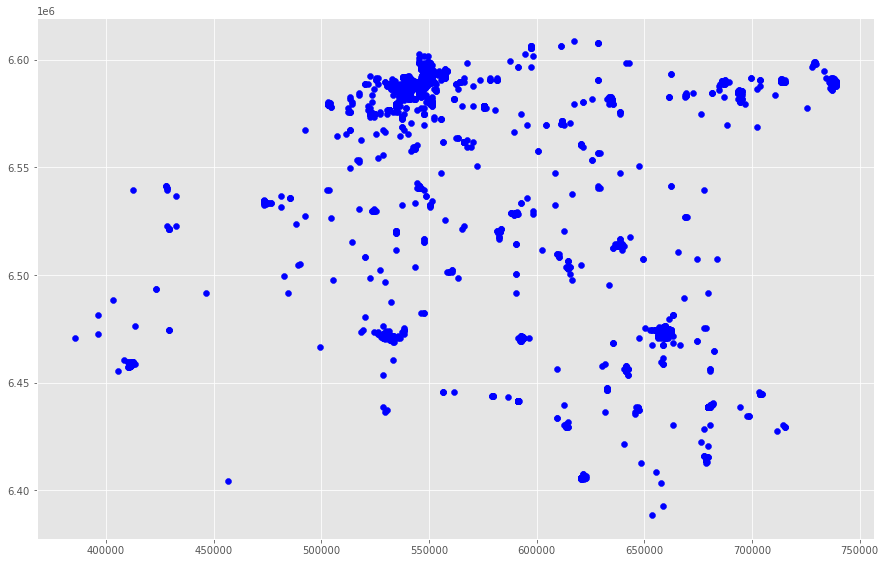

In [16]:
import pandas as pd
import geopandas as gpd
from fiona.crs import from_epsg
from shapely.geometry import Polygon
from shapely.geometry import Point

#converting data frame into geodataframe:
geo = gpd.GeoDataFrame(df, geometry='geometry', crs=from_epsg(3301))
type(geo)
geo.crs 

#plotting
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 15)
fig, ax = plt.subplots();


geo.plot(ax=ax, facecolor='blue');


In [71]:
#bringing poligons of counties
import geopandas as gpd
#bringing data of counties from(https://geoportaal.maaamet.ee/docs/haldus_asustus/maakond_shp.zip")
counties= gpd.read_file('C:/Users/HP/geopython2020/final/maakond_20201201.shp')


In [18]:
#grouping by(x and y)
df2=df.groupby(['x','y']).size().reset_index(name='counts')
display(df2)



,x,y,counts
0,6388499.5,653499.5,1
1,6392499.5,658499.5,1
2,6403499.5,657499.5,1
3,6404499.5,456499.5,1
4,6405249.5,620749.5,2
...,...,...,...
1090,6605499.5,597499.5,7
1091,6606499.5,597499.5,7
1092,6606499.5,611499.5,2
1093,6607499.5,628499.5,4


In [77]:
#making geometry column again
def make_point(row):
    y=row['x']
    x=row['y']
    point=Point(x,y)
    return point

df2['geometry'] = df2.apply(make_point, axis=1)
df2.head(5)
geo_c=gpd.GeoDataFrame(df2, geometry='geometry',crs=from_epsg(3301))

#projecting dataframes
counties.crs
geo2 = gpd.GeoDataFrame(df2, geometry='geometry',crs=from_epsg(3301))
geo2=geo2.to_crs(3301)
geo2.crs
geo2.crs==counties.crs
#spatial join of counties and crimes
join = gpd.sjoin(counties, geo2, how="inner", op="contains")
display(join)

E:\python\installconda\envs\geopy2020\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,MNIMI,MKOOD,geometry,index_right,x,y,counts
0,Viljandi maakond,0084,"MULTIPOLYGON (((621049.180 6453125.120, 621052...",61,6441249.5,591249.5,47
0,Viljandi maakond,0084,"MULTIPOLYGON (((621049.180 6453125.120, 621052...",62,6441249.5,591749.5,1
0,Viljandi maakond,0084,"MULTIPOLYGON (((621049.180 6453125.120, 621052...",63,6443499.5,586499.5,1
0,Viljandi maakond,0084,"MULTIPOLYGON (((621049.180 6453125.120, 621052...",64,6443749.5,579249.5,3
0,Viljandi maakond,0084,"MULTIPOLYGON (((621049.180 6453125.120, 621052...",65,6443749.5,579749.5,5
...,...,...,...,...,...,...,...
14,Saare maakond,0074,"MULTIPOLYGON (((456706.500 6404490.680, 456704...",101,6459499.5,411499.5,3
14,Saare maakond,0074,"MULTIPOLYGON (((456706.500 6404490.680, 456704...",102,6459499.5,412499.5,4
14,Saare maakond,0074,"MULTIPOLYGON (((456706.500 6404490.680, 456704...",104,6460499.5,408499.5,1
14,Saare maakond,0074,"MULTIPOLYGON (((456706.500 6404490.680, 456704...",126,6470499.5,385499.5,1


In [78]:
display(geo_c)

,x,y,counts,geometry
0,6388499.5,653499.5,1,POINT (653499.500 6388499.500)
1,6392499.5,658499.5,1,POINT (658499.500 6392499.500)
2,6403499.5,657499.5,1,POINT (657499.500 6403499.500)
3,6404499.5,456499.5,1,POINT (456499.500 6404499.500)
4,6405249.5,620749.5,2,POINT (620749.500 6405249.500)
...,...,...,...,...
1090,6605499.5,597499.5,7,POINT (597499.500 6605499.500)
1091,6606499.5,597499.5,7,POINT (597499.500 6606499.500)
1092,6606499.5,611499.5,2,POINT (611499.500 6606499.500)
1093,6607499.5,628499.5,4,POINT (628499.500 6607499.500)


In [72]:
#grouping by MNIMI

df3=join.groupby(['MNIMI']).size().reset_index(name='counts')
df4 = pd.merge(df3, counties)
display(df4)
geo3 = gpd.GeoDataFrame(df4, geometry='geometry',crs=from_epsg(3301))


,MNIMI,counts,MKOOD,geometry
0,Harju maakond,515,0037,"MULTIPOLYGON (((505059.934 6570389.813, 505061..."
1,Hiiu maakond,8,0039,"MULTIPOLYGON (((418045.779 6506293.321, 418044..."
2,Ida-Viru maakond,112,0045,"MULTIPOLYGON (((714872.766 6546062.165, 714871..."
3,Järva maakond,33,0052,"POLYGON ((560449.290 6519256.000, 560687.830 6..."
4,Jõgeva maakond,33,0050,"POLYGON ((680751.940 6541260.098, 680750.298 6..."
5,Lääne maakond,19,0056,"MULTIPOLYGON (((460628.287 6512871.566, 460630..."
6,Lääne-Viru maakond,40,0060,"MULTIPOLYGON (((657694.057 6598663.354, 657693..."
7,Pärnu maakond,78,0068,"MULTIPOLYGON (((524948.991 6428670.980, 524949..."
8,Põlva maakond,19,0064,"MULTIPOLYGON (((703347.345 6461975.893, 703344..."
9,Rapla maakond,32,0071,"POLYGON ((504136.450 6536681.570, 504465.710 6..."


In [73]:
#bringing population data from staticsetonia(https://andmed.stat.ee/en/stat/rahvastik__rahvastikunaitajad-ja-koosseis__rahvaarv-ja-rahvastiku-koosseis/RV0213U)
population = pd.read_csv('C:/Users/HP/geopython2020/final/population.csv', sep=',', encoding='latin1')
counties_population= pd.merge(counties, population)
display(counties_population)
geo4 = gpd.GeoDataFrame(counties_population, geometry='geometry',crs=from_epsg(3301))

,MNIMI,MKOOD,geometry,Population
0,Viljandi maakond,0084,"MULTIPOLYGON (((621049.180 6453125.120, 621052...",46161
1,Hiiu maakond,0039,"MULTIPOLYGON (((418045.779 6506293.321, 418044...",9315
2,Harju maakond,0037,"MULTIPOLYGON (((505059.934 6570389.813, 505061...",605029
3,Lääne maakond,0056,"MULTIPOLYGON (((460628.287 6512871.566, 460630...",20444
4,Rapla maakond,0071,"POLYGON ((504136.450 6536681.570, 504465.710 6...",33282
5,Lääne-Viru maakond,0060,"MULTIPOLYGON (((657694.057 6598663.354, 657693...",58862
6,Ida-Viru maakond,0045,"MULTIPOLYGON (((714872.766 6546062.165, 714871...",134259
7,Põlva maakond,0064,"MULTIPOLYGON (((703347.345 6461975.893, 703344...",24647
8,Valga maakond,0081,"MULTIPOLYGON (((621796.890 6441553.960, 621792...",28204
9,Tartu maakond,0079,"MULTIPOLYGON (((705484.908 6476994.745, 705479...",153317


In [65]:
#bringing roads(from other assignments i had the data)
Roads= gpd.read_file('C:/Users/HP/geopython2020/final/Roads.shp')
display(roads)

,NIMETUS,TEE_NR,TYYP,geometry
0,Mõniste - Ape,68,Tugimaantee,"LINESTRING (659609.213 6382150.692, 659607.630..."
1,Mõniste - Ape,68,Tugimaantee,"LINESTRING (659217.930 6384234.810, 659155.194..."
2,Mehka - Vastse-Roosa,25198,Kõrvalmaantee,"LINESTRING (653878.680 6384650.370, 654006.520..."
3,Mõniste - Tiitsa - Karisöödi,25199,Kõrvalmaantee,"LINESTRING (654215.340 6381180.480, 653995.310..."
4,Mõniste - Tiitsa - Karisöödi,25199,Kõrvalmaantee,"LINESTRING (651182.310 6385041.860, 651198.480..."
...,...,...,...,...
6087,Loksa - Pärispea,11285,Kõrvalmaantee,"LINESTRING (597470.895 6605859.260, 597436.430..."
6088,Viinistu - Pärispea,11287,Kõrvalmaantee,"LINESTRING (595868.990 6613279.660, 595974.810..."
6089,Loksa - Viinistu,11280,Kõrvalmaantee,"LINESTRING (599404.810 6608181.820, 599511.260..."
6090,Loksa - Pärispea,11285,Kõrvalmaantee,"LINESTRING (595868.990 6613279.660, 595780.610..."


In [99]:
import folium
#Let's change the basemap style to 'Stamen Toner'
m = folium.Map(location=[58.44, 25.99], tiles='Stamen Toner', zoom_start=7, control_scale=True, prefer_canvas=True, width=600, height=450)


In [86]:
#saving files into newdataframes
crimes=geo_c
roads=Roads
c_p=geo4
cc=geo3


In [184]:
# Re-project to WGS84, Folium requires all data to be in WGS84
crimes['geometry'] = crimes['geometry'].to_crs(epsg=4326)

roads['geometry'] = roads['geometry'].to_crs(epsg=4326)
c_p['geometry'] = c_p['geometry'].to_crs(epsg=4326)
cc['geometry'] = cc['geometry'].to_crs(epsg=4326)

In [186]:
# Create a Geo-id which is needed by the Folium (it needs to have a unique identifier for each row)
crimes['geoid'] = crimes.index.astype(str)

roads['geoid'] = roads.index.astype(str)

c_p['geoid'] =  c_p.index.astype(str)
cc['geoid'] =  cc.index.astype(str)
# Select data
crimes = crimes[['geoid', 'counts', 'geometry']]

roads = roads[['geoid', 'TYYP', 'geometry']]

c_p = c_p[['geoid', 'Population', 'geometry']]
cc= cc[['geoid', 'counts', 'geometry']]

In [187]:
#convert the dataframe to geojson
crimes_jsontxt= crimes.to_json()
roads_jsontxt = roads.to_json()
c_p_jsontxt = c_p.to_json()
cc_jsontxt = cc.to_json()

In [188]:
m = folium.Map(location=[58.37, 26.72], zoom_start=8, control_scale=True, prefer_canvas=True, width=600, height=450)

folium.GeoJson(crimes_jsontxt).add_to(m)

folium.GeoJson(roads_jsontxt).add_to(m)

folium.GeoJson(c_p_jsontxt).add_to(m)

folium.GeoJson(cc_jsontxt).add_to(m)


In [111]:
import folium
from folium.plugins import MarkerCluster
import folium.plugins
folium.plugins.MarkerCluster()

In [200]:
import pysal.viz.mapclassify as mc

# Initialize the classifier and apply it
classifier = mc.NaturalBreaks.make(k=5)

c_p['population'] = c_p[['Population']].apply(classifier)

m = folium.Map(location=[58.37, 26.72],
             tiles='Stamen terrain',
             zoom_start=8,
             control_scale=True,
             prefer_canvas=True,
             width=600,
             height=450)
 

#Next we define a styling f
# Create Choropleth map where the colors are coming from a column "Population".
# Notice: 'geoid' column that we created earlier needs to be assigned always as the first column
folium.Choropleth(
     geo_data=c_p_jsontxt,
     data=c_p,
     columns=['geoid', 'Population'],
     key_on="feature.id",
     fill_opacity=0.5,
     line_opacity=0.2,
     line_color='black',
     line_weight=0,
     legend_name='Population classified Natural Breaks in Estonia',
     name='Population ',
     highlight=False,
     fill_color='BrBG'
 ).add_to(m)

# and we are adding a LayerControl widget to the map, so we can activate/deactivate the layer
folium.LayerControl(collapsed=True).add_to(m)


In [201]:
def getLinesAsPointList(row, geom):
    if isinstance(row[geom], LineString):
        return []
    else:
        list_x = list(row[geom].coords.xy[0])
        list_y = list(row[geom].coords.xy[1])
        return list(zip(list_y, list_x))
 # Calculate x and y coordinates of the line
roads['points_list'] = roads.apply(getLinesAsPointList, geom='geometry', axis=1)

# list of lat lon coordinate pair tuples
# roadpoints = [a for a in roads['points_list'].tolist() if len(a) >=2 ]
roadpoints = []

for a in roads['points_list'].tolist():
     if len(a) >=2:
            roadpoints.append(a)
m=folium.Map(location=[58.37, 26.72],
            tiles='Stamen toner',
            zoom_start=8,
            control_scale=True,
            prefer_canvas=True,
            width=600,
            height=450)
 
for road in roadpoints:
    folium.PolyLine(locations=road['points_list'], color="red", weight=2.5, opacity=1).add_to(m)            

In [202]:
# define the function to extract the linestring coordinates
from shapely.geometry import Point

def getPoints(row, geom):
    if isinstance(row[geom], Point):
        return (row[geom].y, row[geom].x)
    else:
        return ()


In [203]:
m = folium.Map(location=[58.37, 26.72],
             tiles='Stamen terrain',
             zoom_start=8,
             control_scale=True,
             prefer_canvas=True,
             width=600,
             height=450)
 

# Calculate x and y coordinates of the line
crimes['points_tuple'] = crimes.apply(getPoints, geom='geometry', axis=1)

for idx, crime in crimes.iterrows():
    folium.CircleMarker(location=crime['points_tuple'], popup=crime['counts'], color="yellow", radius=2.5, opacity=0.9).add_to(m) 

In [204]:
from folium.plugins import MarkerCluster

# Get lat and lon of points
latlon = [[tup[0], tup[1]] for tup in crimes['points_tuple'].tolist()]

m = folium.Map(location=[58.37, 26.72],
             tiles='Stamen terrain',
             zoom_start=8,
             control_scale=True,
             prefer_canvas=True,
             width=600,
             height=450)
 
# This function creates clusters for the points that are in the same area
# and then places them on the map
MarkerCluster(locations=latlon, fill_color='#2b8cbe', name="Crimes", number_of_sides=6, radius=6).add_to(m)
# we also add a layer control to handle the clustered points as a single layer.
folium.LayerControl().add_to(m)


In [205]:
from folium.plugins import HeatMap

import numpy as np

# you can use weights for the heatmap, in order to make points more important. To demonstrate I use random values, though.
random_weights = np.random.randint(low=1, high=10, size=len(crimes))

# we add lat, lon, and also weights, into each data point tuple
heat_data = []
# Get lat and lon of points, you can do that with or without weights
for idx, row in crimes.iterrows():
    tup = row['points_tuple']
    elem = [tup[0], tup[1], int(random_weights[idx])]
    heat_data.append(elem)
 #create the base map
m = folium.Map(location=[58.37, 26.72],
             tiles='Stamen toner',
             zoom_start=8,
             control_scale=True,
             prefer_canvas=True,
             width=600,
             height=450)
 

# This function creates the heatmap based on the points and weights that are in close area
# and then places them on the map
HeatMap(data=heat_data,
         name="crimes density",
         min_opacity=0.5,
         max_zoom=18,
         max_val=1.0,
         radius=25,
         blur=15,
         overlay=True,
         control=True).add_to(m)

# and we add the layer control
folium.LayerControl().add_to(m)


In [206]:
#bringing map of crimes by counties
import pysal.viz.mapclassify as mc

# Initialize the classifier and apply it
classifier = mc.NaturalBreaks.make(k=5)

cc['Counts'] = cc[['counts']].apply(classifier)

m = folium.Map(location=[58.37, 26.72],
             tiles='Stamen terrain',
             zoom_start=10,
             control_scale=True,
             prefer_canvas=True,
             width=600,
             height=450)
 

#Next we define a styling f
# Create Choropleth map where the colors are coming from a column "Population".
# Notice: 'geoid' column that we created earlier needs to be assigned always as the first column
folium.Choropleth(
     geo_data=cc_jsontxt,
     data=cc,
     columns=['geoid', 'counts'],
     key_on="feature.id",
     fill_opacity=0.5,
     line_opacity=0.2,
     line_color='black',
     line_weight=0,
     legend_name='crimes classified Natural Breaks in Estonia',
     name='crimes ',
     highlight=False,
     fill_color='RdYlGn'
 ).add_to(m)

# and we are adding a LayerControl widget to the map, so we can activate/deactivate the layer
folium.LayerControl(collapsed=True).add_to(m)


E:\python\installconda\envs\geopy2020\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [218]:
# Adding all
import folium
from folium.plugins import MarkerCluster

# basemap
m = folium.Map(location=[58.37, 26.72],
             tiles='OpenStreetMap',
             zoom_start=8,
             control_scale=True,
             prefer_canvas=True,
             width=600,
             height=450)
#coloured crime per county layer
folium.Choropleth(
     geo_data=cc_jsontxt,
     data=cc,
     columns=['geoid', 'counts'],
     key_on="feature.id",
     fill_opacity=0.5,
     line_opacity=0.2,
     line_color='black',
     line_weight=0,
     legend_name='crimes classified Natural Breaks in Estonia',
     name='Crimes in counties ',
     highlight=False,
     fill_color='YlOrRd'
 ).add_to(m)

# coloured population layer
folium.Choropleth(
     geo_data=c_p_jsontxt,
     data=c_p,
     columns=['geoid', 'Population'],
     key_on="feature.id",
     fill_opacity=0.5,
     line_opacity=0.2,
     line_color='black',
     line_weight=0,
     legend_name='Population classified Natural Breaks in Estonia',
     name='Population ',
     highlight=False,
     fill_color='BrBG'
 ).add_to(m)

#adding heat map
HeatMap(data=heat_data,
         name="Crimes density",
         min_opacity=0.5,
         max_zoom=18,
         max_val=1.0,
         radius=25,
         blur=15,
         overlay=True,
         control=True).add_to(m)
# initalise a road layer holing object
roads_layer = folium.FeatureGroup(name="roads layer")

# add the roads to the intermediate layer object, and not directly to the map
for road in roadpoints:
     folium.PolyLine(locations=road, color="grey", weight=2.5, opacity=1).add_to(roads_layer)
# then we add the roads layer to the map
roads_layer.add_to(m)


# This function creates clusters for the points that are in the same area
marker_cluster = MarkerCluster(name="Crimes marker cluster", number_of_sides=6, radius=6)

# and then places them in the marker cluster
for idx, crime in crimes.iterrows():
    folium.Marker(location=crime['points_tuple'],
                         popup=crime['counts'],
                         color="yellow",
                         radius=5,
                         opacity=0.9).add_to(marker_cluster)
# and add the marker cluster to the map
marker_cluster.add_to(m) 

# create another layer object for the circle markers
circles_layer = folium.FeatureGroup(name="Crime points")

# the yellow school circles as reference
for idx, crime in crimes.iterrows():
     folium.CircleMarker(location=crime['points_tuple'],
                         popup=crime['counts'],
                         color="red",
                         radius=2.5,
                         opacity=0.9).add_to(circles_layer) 

# and add the circle layer to the map
circles_layer.add_to(m)

# add the layer control switch, which can now control the separate layer holding objects for the single points and roads
folium.LayerControl().add_to(m)


In [220]:
# Filepath to the output
outfp = "E:/crimes_full_map.html"

# Save the map
m.save(outfp)

In [1]:
m

In [221]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
# in Jupyter Notebook don't forget to enable the inline plotting magic
import matplotlib.pyplot as plt
%matplotlib inline

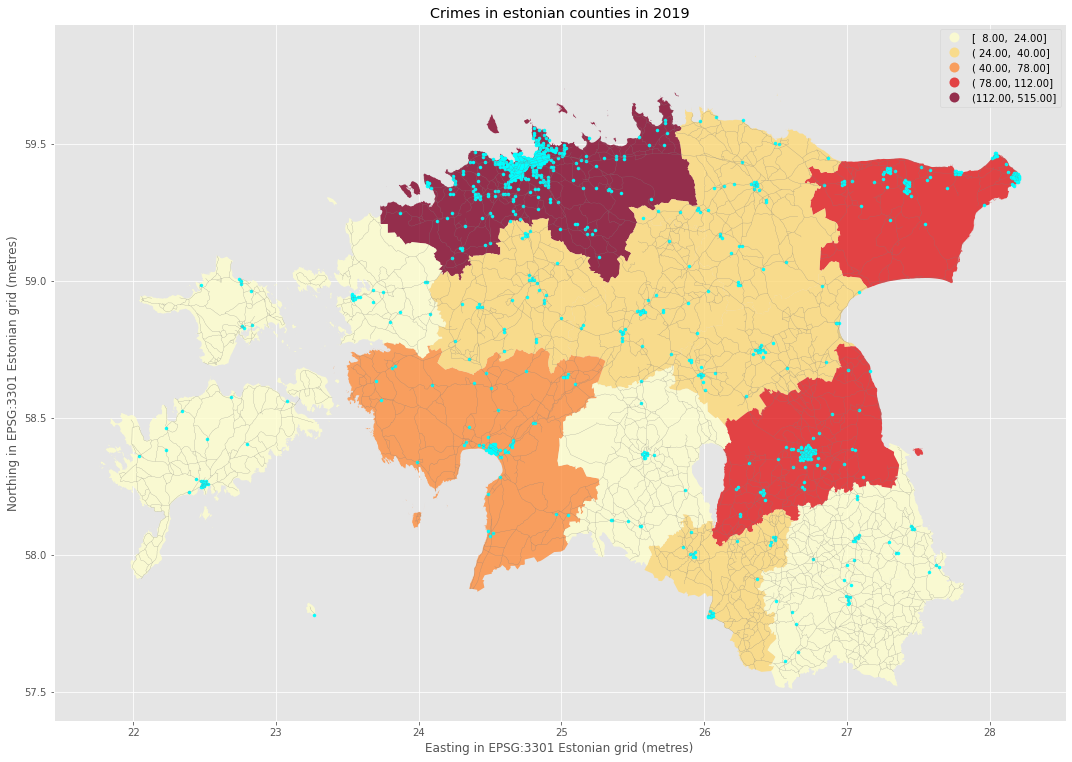

In [255]:
fig, ax = plt.subplots(figsize=(15, 13))

# Visualize 
cc.plot(column="counts", ax=ax, linewidth=0.03, cmap="YlOrRd", scheme="naturalbreaks", k=5, alpha=0.8, legend=True)

# Add roads on top of the grid
# (use ax parameter to define the map on top of which the second items are plotted)
Roads.plot(ax=ax, color="grey", linewidth=0.2)

# Add schools on top of the previous map
geo_c.plot(ax=ax, color="cyan", markersize=9.0)

# Remove the empty white-space around the axes
plt.title("Crimes in estonian counties in 2019")

ax.set_ylabel('Northing in EPSG:3301 Estonian grid (metres)')
ax.set_xlabel('Easting in EPSG:3301 Estonian grid (metres)')

plt.tight_layout()

In [259]:
outfp = "E:/ww/map.png"
plt.savefig(outfp, dpi=100)

<Figure size 432x288 with 0 Axes>